# Run the whole deltas algorithm

In [65]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

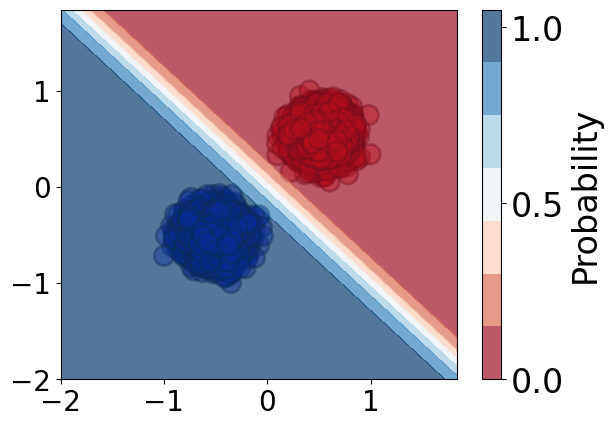

In [66]:
N1 = 10000
N2 = 10000
data_clf = pipeline.get_data_and_classifier(N1=N1, N2=N2)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.4902515095804214
R2 empirical: 0.47570837227351637


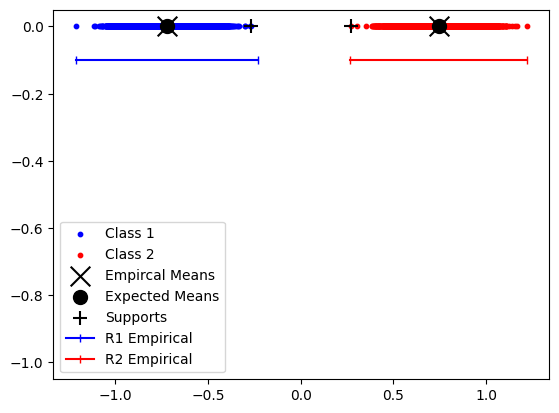

In [67]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'])

## set up extra parameters

In [68]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
data_info['N1'] = N1
data_info['N2'] = N2
pipeline.print_params(data_info)

Parameters
        R:  1.219857609036177
        N1: 10000
        N2: 10000
        R1: 0.4902515095804214
        R2: 0.47570837227351637
        M:  0.5361127631125335
        D:  1.4673140751109441
        C1: 1
        C2: 1


## Optimiser

delta1 : 0.6182610962594495 
delta2: 2.2184216327572692e-72
constraint: [0.06334161] should equal 0
R1_est : 0.5629710606921348 
R2_est: 0.5484279233852298


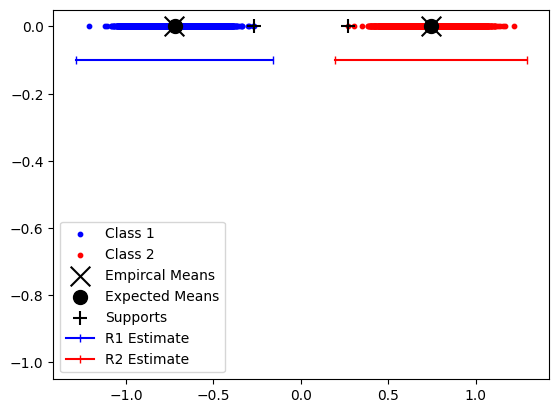

In [69]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1
 
delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, delta1_from_delta2_func)